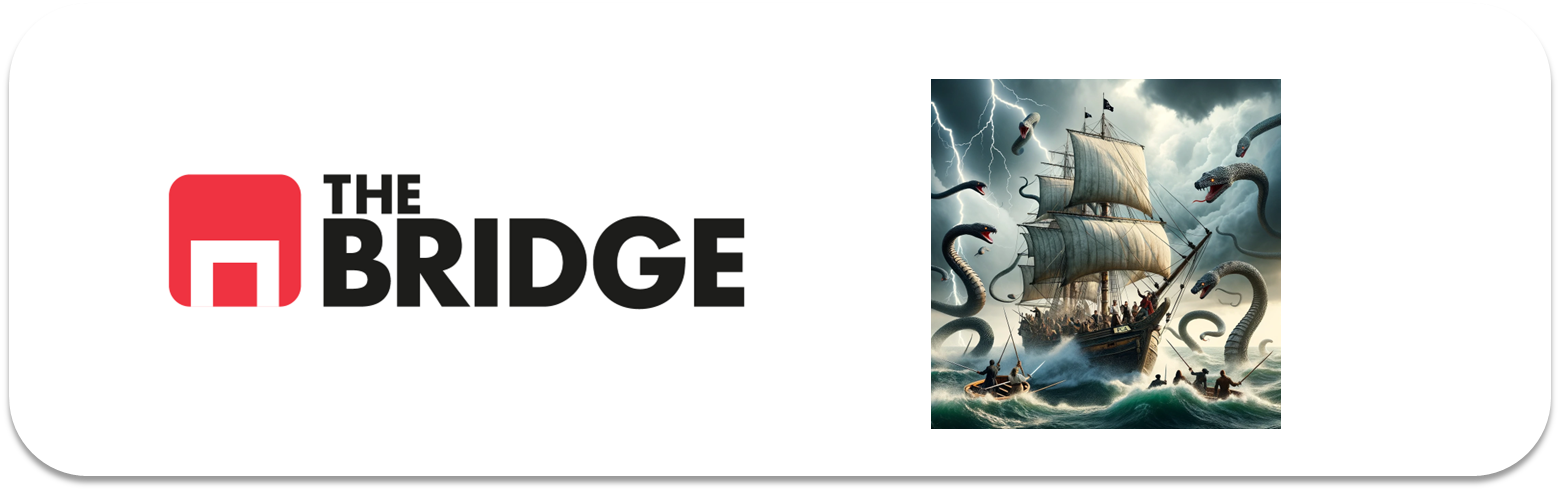

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [60]:
import bootcampviztools as bt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import seaborn.objects as so

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import balanced_accuracy_score, mutual_info_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [61]:
df = pd.read_csv('data/credit_npo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [62]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [63]:
target = 'SeriousDlqin2yrs'

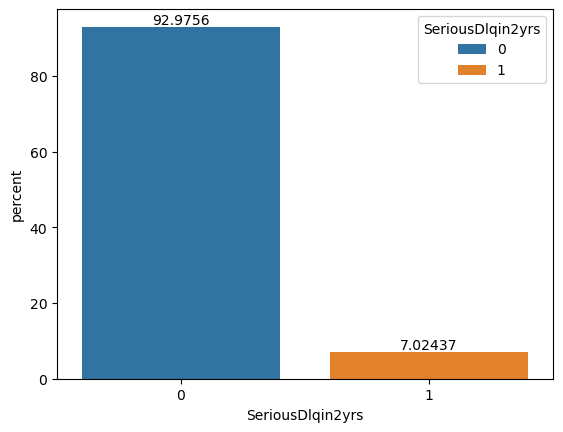

In [64]:
ax = sns.countplot(data=df, x=target, hue=target, stat='percent')
for container in ax.containers:
    ax.bar_label(container)

In [65]:
train, test = train_test_split(df, test_size=0.2, random_state = 42)

In [66]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000,9452.000000
mean,0.070144,0.335207,51.491536,0.343314,0.486047,6868.428058,8.794647,0.180279,1.064325,0.152772,0.863415
std,0.255403,0.362233,14.499298,2.930489,2.505031,12580.543336,5.139555,2.889984,1.148156,2.870119,1.158238
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034869,41.000000,0.000000,0.146204,3466.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.179211,51.000000,0.000000,0.297564,5441.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.587533,62.000000,0.000000,0.477876,8300.000000,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,6.000000,101.000000,98.000000,96.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [67]:
train.NumberOfTimes90DaysLate.max()

98

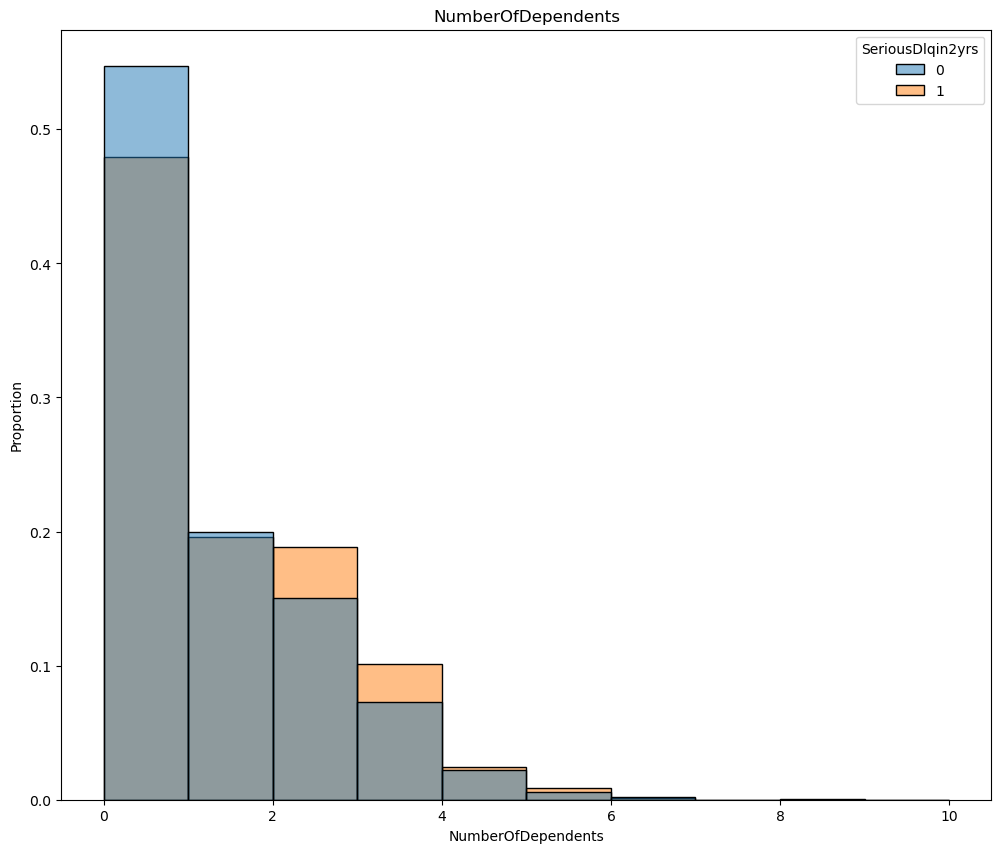

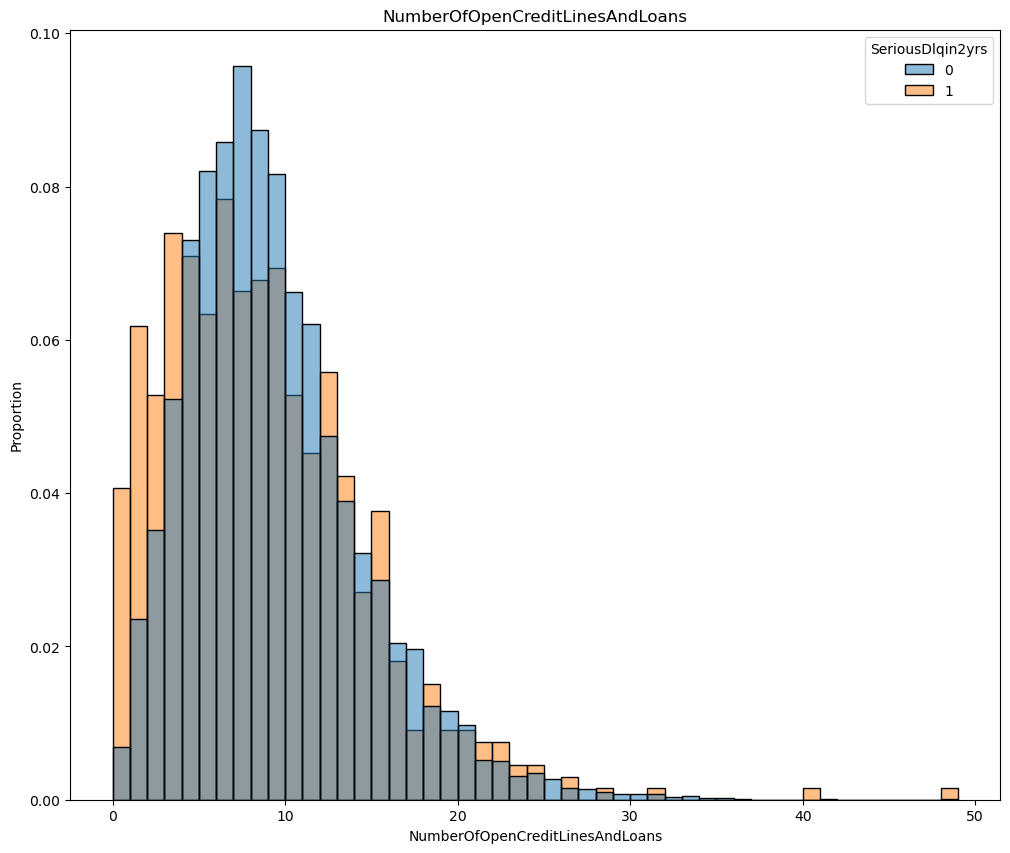

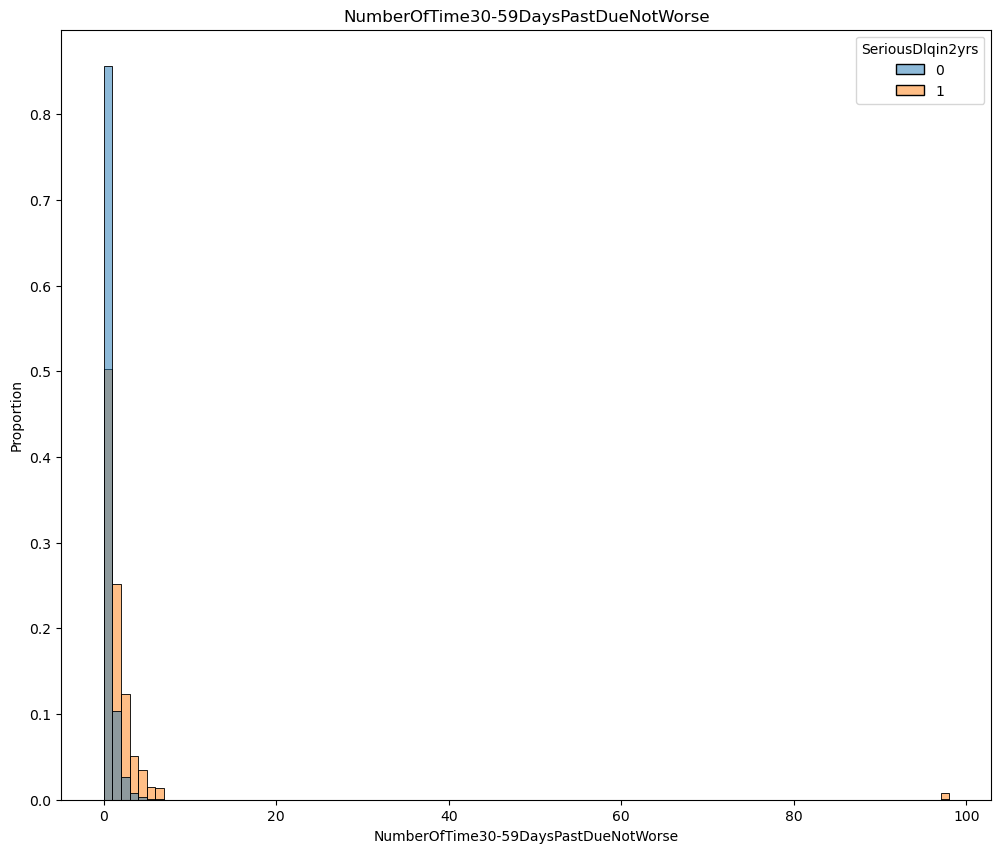

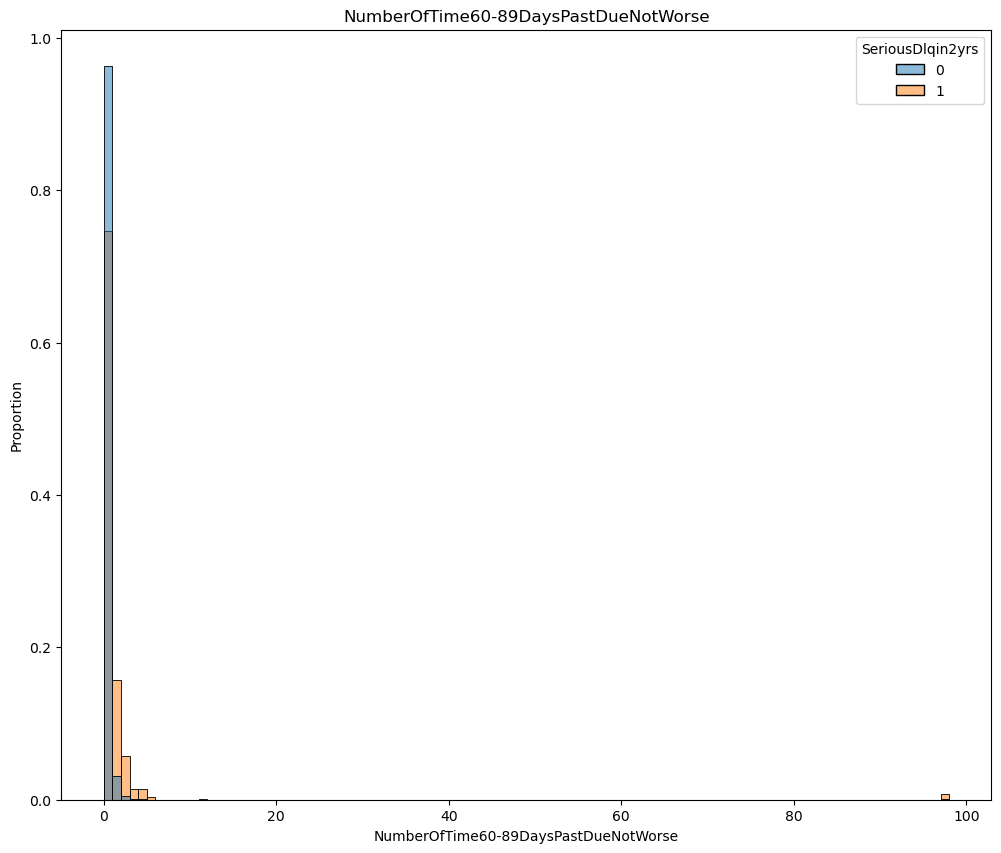

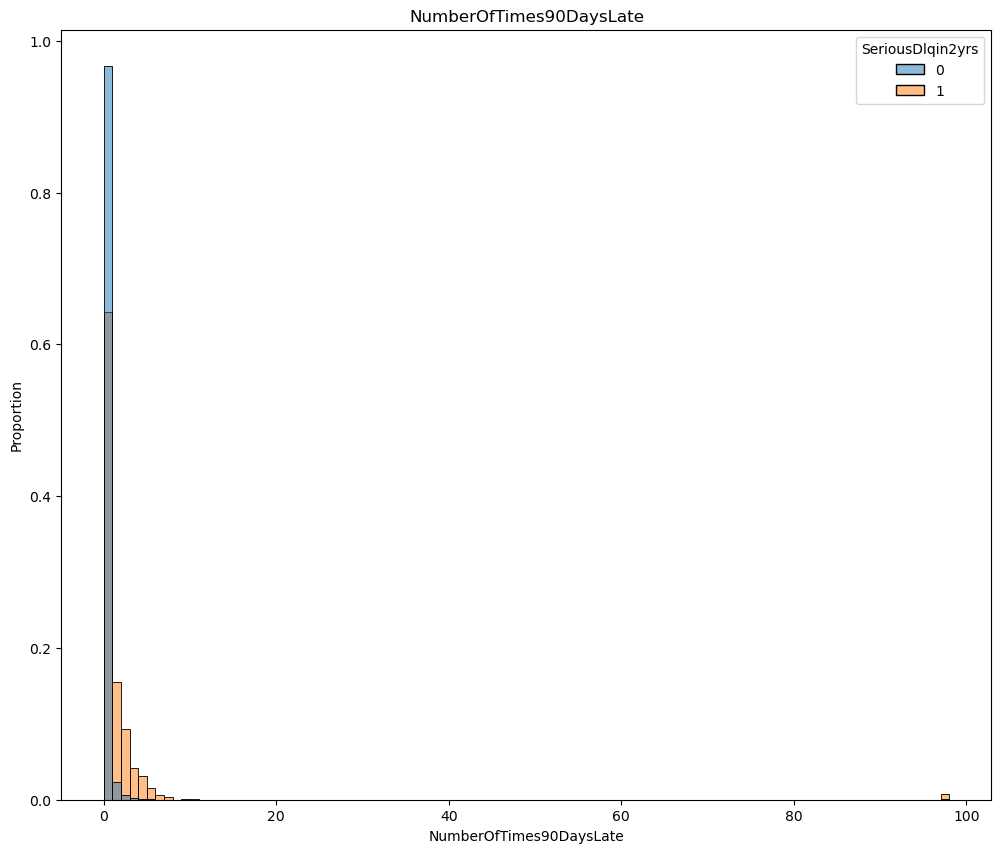

In [68]:
for feat in sorted(train.columns):
    if 'NumberOf' in feat:
        plt.figure(figsize=(12, 10))
        sns.histplot(train, x=feat, hue=target, bins=int(train[feat].max()), stat='proportion', common_norm=False)
        plt.title(feat)
        plt.show();

Solo pasaremos a categóricas las tres variables NumberOfTimes[...], con 3 valores (0, 1, 2+)

In [69]:
def categorizar(n):
    if n in (0,1):
        return n
    else:
        return 2

for ds in train, test:
    for feat in train.columns:
        if 'NumberOfTime' in feat:
            ds[feat] = ds[feat].apply(categorizar)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9452 entries, 11145 to 7727
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9452 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9452 non-null   float64
 2   age                                   9452 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9452 non-null   int64  
 4   DebtRatio                             9452 non-null   float64
 5   MonthlyIncome                         9452 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9452 non-null   int64  
 7   NumberOfTimes90DaysLate               9452 non-null   int64  
 8   NumberRealEstateLoansOrLines          9452 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9452 non-null   int64  
 10  NumberOfDependents                    9452 non-null   float64
dtypes: float64(4), int

### Mini-EDA

#### 1. Visual

In [71]:
cats = sorted(x for x in train.columns if 'NumberOfTime' in x)
nums = [x for x in train.columns if x not in cats+[target]]

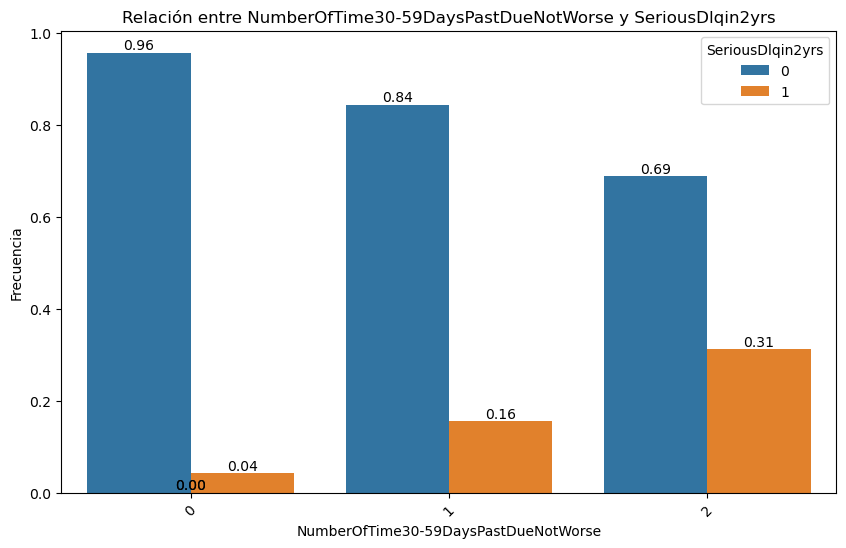

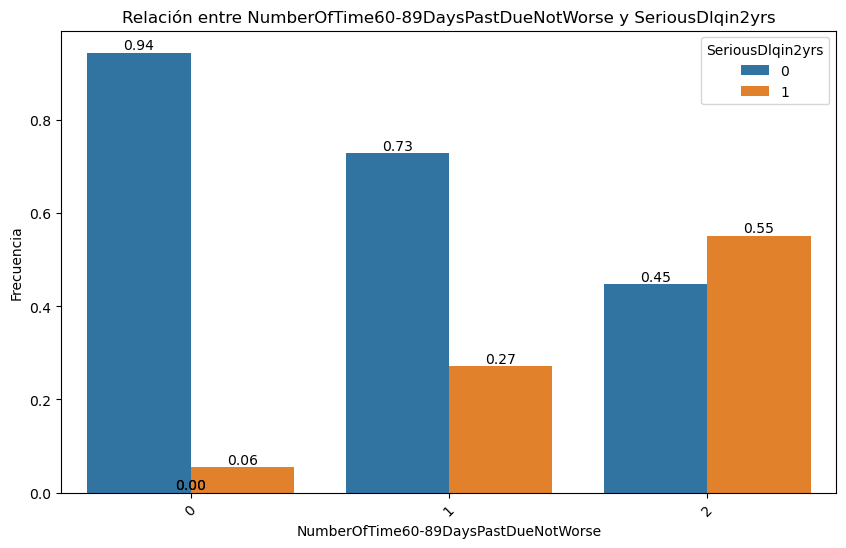

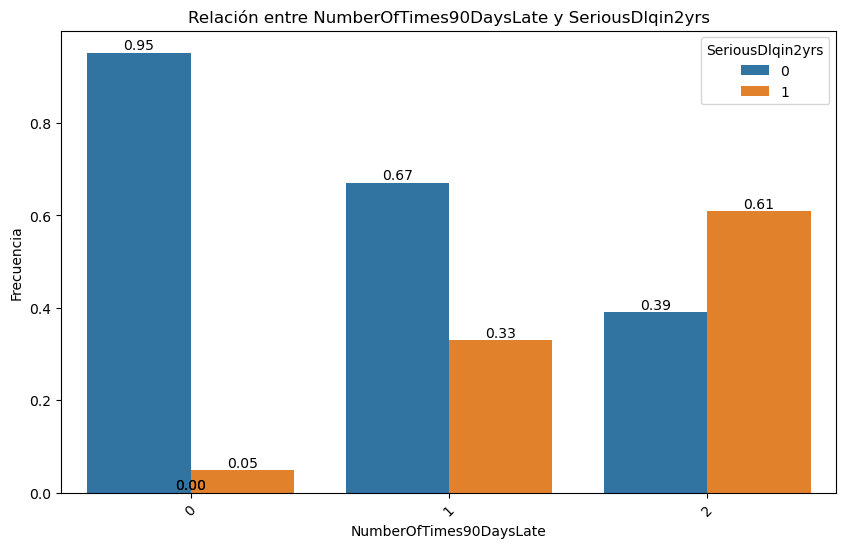

In [72]:
for cat_col in cats:
    bt.plot_categorical_relationship_fin(train,cat_col,target,show_values= True, relative_freq= True)

Las dos últimas serían claramente primera división, con esa inversión que se da en 2+.

La primera seguramente también nos sirve, pero seguramente no tenga tanto poder informativo como las otras 2.

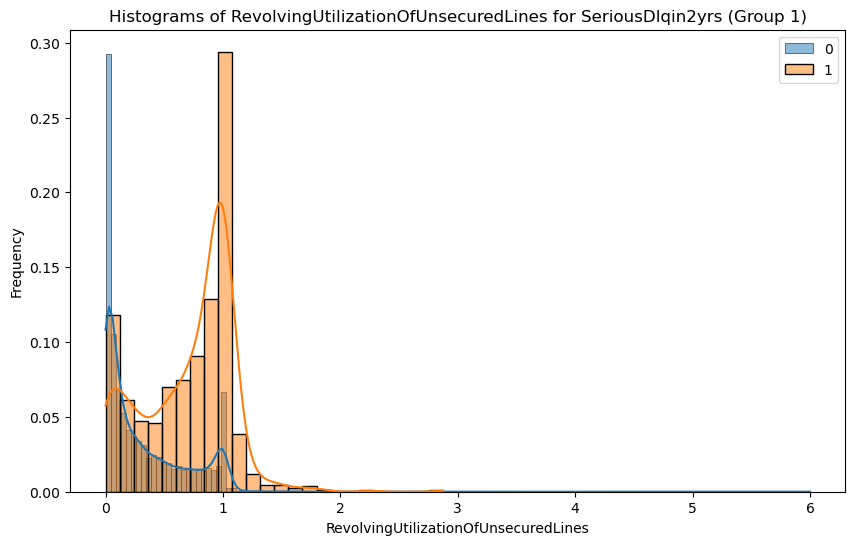

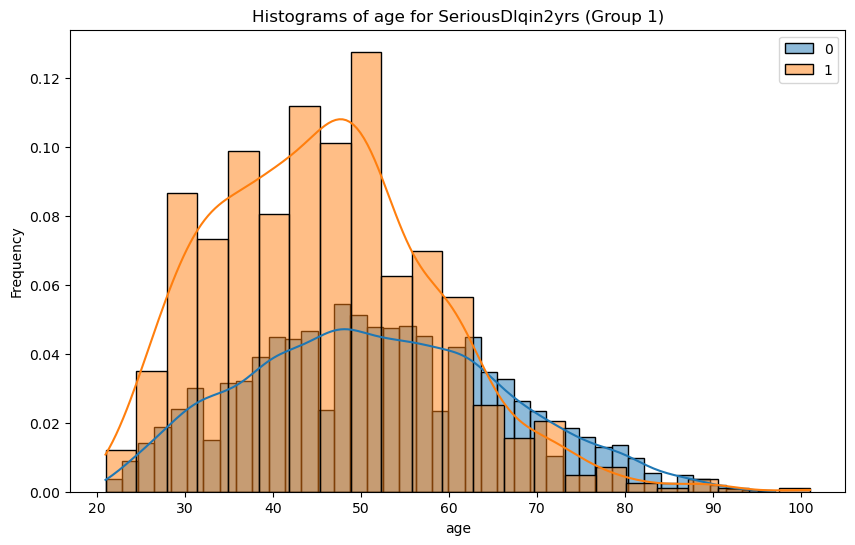

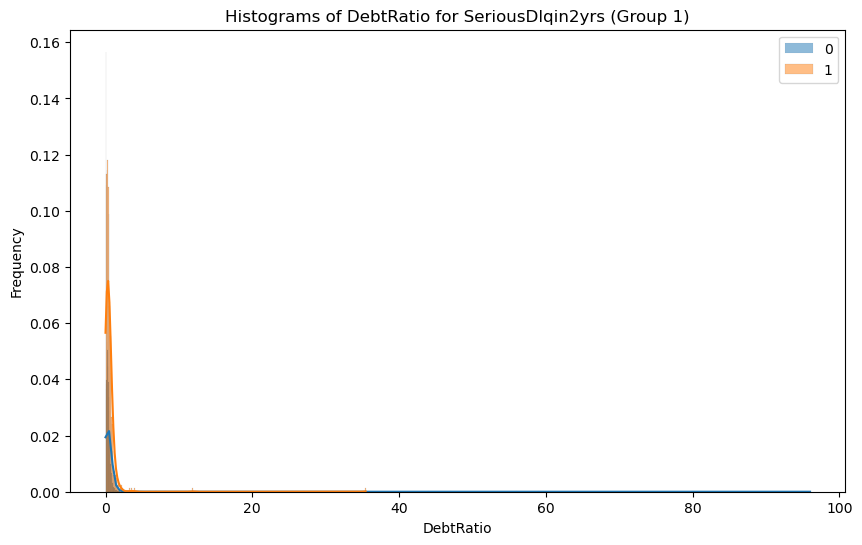

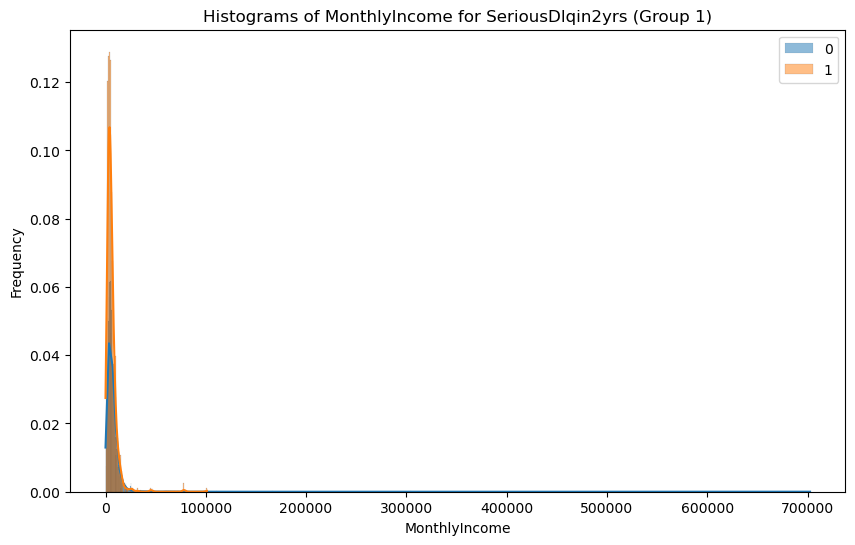

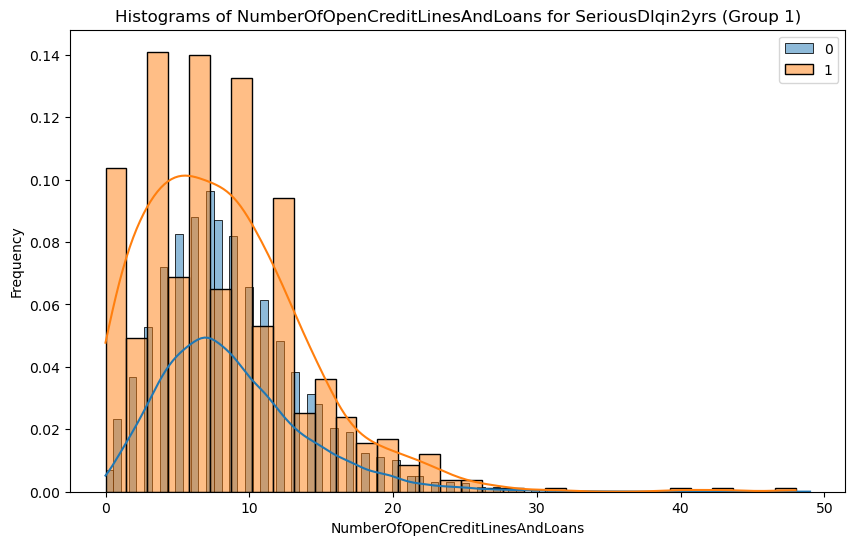

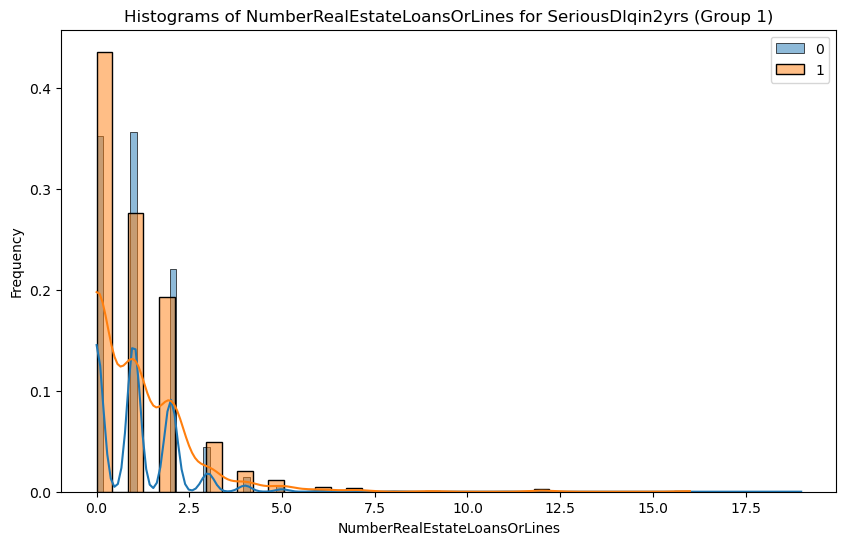

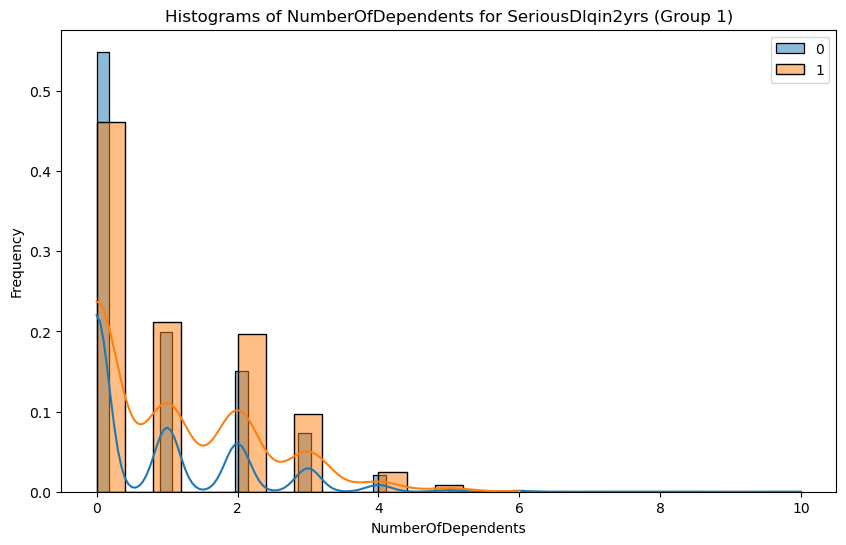

In [73]:
for num_col in nums:
    bt.plot_grouped_histograms(df,cat_col = target, num_col= num_col, group_size= 2, stat='proportion', common_norm=False)

Revolving es claramente primera división. Del resto, age podría ser segunda división, y el resto las descartaría.

In [74]:
corr= train[nums+[target]].corr(numeric_only=True)
serie_corr = np.abs(corr[target])
serie_corr.sort_values(ascending = False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.284084
age                                     0.107801
NumberOfDependents                      0.038829
NumberOfOpenCreditLinesAndLoans         0.032472
MonthlyIncome                           0.018163
DebtRatio                               0.001863
NumberRealEstateLoansOrLines            0.001677
Name: SeriousDlqin2yrs, dtype: float64

A pesar de que nuestro target es categórico, las correlaciones apoyan el análisis visual.

In [75]:
umbrales_varianza = [0.5, 0.6, 0.7, 0.8, 0.9]

for umbral in umbrales_varianza:
    var_selector = VarianceThreshold(umbral)
    var_selector.fit(train)
    print("Lista seleccionada para selector de Varianza con umbral", umbral, var_selector.get_feature_names_out())
    print()

Lista seleccionada para selector de Varianza con umbral 0.5 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']

Lista seleccionada para selector de Varianza con umbral 0.6 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']

Lista seleccionada para selector de Varianza con umbral 0.7 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']

Lista seleccionada para selector de Varianza con umbral 0.8 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']

Lista seleccionada para selector de Varianza con umbral 0.9 ['age' 'DebtRatio' 'MonthlyIncome' 'NumberOfOpenCreditLinesAndLoans'
 'NumberRealEstateLoansOrLines' 'NumberOfDependents']



Por umbral de varianza solo descartaría Revolving, que es la que visualmente era más atractiva. Este método no tiene en cuenta el target ni su desbalanceo, por lo cual lo voy a ignorar.

In [76]:
visual_primeras = ['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines']

#### 2.1 SelectKBest y ANOVA

In [77]:
X_train = train[nums]
y_train = train[target]

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)

selector.get_feature_names_out().tolist()

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfDependents']

#### 2.2 Mutual Information

In [78]:
for col in cats:
    print(f"MI({col};{target}):", mutual_info_score(train[col],train[target]))

MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.024765507782367968
MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.019359076290288817
MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03640147583203619


In [79]:
anova_mi_primeras = selector.get_feature_names_out().tolist()+['NumberOfTimes90DaysLate']

#### 3. SelectFromModel

In [80]:
X_train, y_train = train.drop(target, axis=1), train[target]

lr_selector = LogisticRegression(class_weight='balanced', max_iter = 10000)
rf_selector = RandomForestClassifier(class_weight='balanced', random_state= 42)

lr_selector.fit(X_train, y_train)
rf_selector.fit(X_train, y_train)

for estimator in [rf_selector, lr_selector]:
    selector_model = SelectFromModel(estimator = estimator, threshold= "median")
    selector_model.fit(X_train, y_train)
    print('Selección con', estimator, selector_model.get_feature_names_out().tolist())

Selección con RandomForestClassifier(class_weight='balanced', random_state=42) ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome']
Selección con LogisticRegression(class_weight='balanced', max_iter=10000) ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']


In [81]:
# Me quedo con los de RandomForest que es más restrictivo:

model_primeras = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome']

#### 4. RFE

In [82]:
rf_RFE = RandomForestClassifier(class_weight='balanced', random_state= 42)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Me quedo con 5 features ya que es el número que salió en SelectFromModel
          step = 1)

rfe.fit(X_train, y_train)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns).sort_values("ranking")

,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
NumberOfTime30-59DaysPastDueNotWorse,1
DebtRatio,1
MonthlyIncome,1
NumberOfOpenCreditLinesAndLoans,2
NumberOfTimes90DaysLate,3
NumberOfTime60-89DaysPastDueNotWorse,4
NumberOfDependents,5
NumberRealEstateLoansOrLines,6


In [83]:
# Y nos salen exactamente las mismas:

rfe_primeras = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome']

#### 5. SFS

In [84]:
rf_SFS = RandomForestClassifier(class_weight='balanced', random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5, # Seguimos con 5
                                        cv = 5,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)

print("Elegidas SFS:", sfs_forward.get_feature_names_out())

Elegidas SFS: ['NumberOfTime30-59DaysPastDueNotWorse' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


In [85]:
# Aquí nos ha cambiado :)

sfs_primeras = sfs_forward.get_feature_names_out().tolist()

#### 6. Hard Voting

In [86]:
from collections import Counter

votos = visual_primeras + anova_mi_primeras + model_primeras + rfe_primeras + sfs_primeras

recuento = Counter(votos)

recuento

Counter({'RevolvingUtilizationOfUnsecuredLines': 4,
         'NumberOfTimes90DaysLate': 3,
         'age': 3,
         'MonthlyIncome': 3,
         'NumberOfTime30-59DaysPastDueNotWorse': 3,
         'NumberOfTime60-89DaysPastDueNotWorse': 2,
         'NumberOfDependents': 2,
         'DebtRatio': 2,
         'NumberOfOpenCreditLinesAndLoans': 1,
         'NumberRealEstateLoansOrLines': 1})

In [87]:
# Tenemos 6 votantes, así que me quedo con las que han sido votadas por al menos la mitad:

hardvoting_primeras = [x for x in recuento.keys() if recuento[x] >= 3]

In [88]:
hardvoting_primeras

['NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse']

### 3. Comparación de modelos

In [89]:
features_selections = [visual_primeras, anova_mi_primeras, model_primeras, rfe_primeras, sfs_primeras, hardvoting_primeras]
features_names = ('visual', 'anova_mi', 'model', 'rfe', 'sfs', 'hardvoting')
feat_dict = {x:y for x,y in zip(features_names, features_selections)}

In [90]:
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
knc = KNeighborsClassifier(n_jobs=-1)

for model in [lr, rf, knc]:
    print(model)
    for selection in features_names:
        print('\twith', selection+':', "balanced_accuracy:\t\t\t", np.mean(cross_val_score(model, X_train[feat_dict[selection]], y_train, scoring = "balanced_accuracy", cv = 5)))
        print('(Features: ', ', '.join(feat_dict[selection])+')')
        print()

LogisticRegression(class_weight='balanced', n_jobs=-1)


	with visual: balanced_accuracy:			 0.7539225327144962
(Features:  NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate, RevolvingUtilizationOfUnsecuredLines)

	with anova_mi: balanced_accuracy:			 0.7382856957808632
(Features:  RevolvingUtilizationOfUnsecuredLines, age, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfDependents, NumberOfTimes90DaysLate)

	with model: balanced_accuracy:			 0.7391970053977316
(Features:  RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome)

	with rfe: balanced_accuracy:			 0.7391970053977316
(Features:  RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome)

	with sfs: balanced_accuracy:			 0.7459870971278547
(Features:  NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents)

	with hardvoting: balanced_accuracy:			 0.7609995576804647
(Fea

Logistic Regression con las features de Hard Voting (NumberOfTimes90DaysLate, RevolvingUtilizationOfUnsecuredLines, age, MonthlyIncome, NumberOfTime30-59DaysPastDueNotWorse) nos dan el mejor resultado: 0.761

### 4. Optimización

In [59]:
X_train_opt = train[hardvoting_primeras]
y_train = train[target]

X_test, y_test = test.drop(target, axis=1), test[target]

X_test_opt = test[hardvoting_primeras]
y_test = test[target]

In [ ]:
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'dual' : [True, False],
#     'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'max_iter' : [100, 1000, 10000]
# }

# grid_search = GridSearchCV(lr, param_grid, scoring='balanced_accuracy', cv=5)

# grid_search.fit(X_train_opt, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got '

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'dual': [True, False], 'max_iter': [100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='balanced_accuracy')

In [57]:
grid_search.best_score_

0.7610451778850754

In [52]:
grid_search.best_params_

{'C': 10,
 'dual': False,
 'max_iter': 10000,
 'penalty': 'l1',
 'solver': 'liblinear'}

Los parámetros son distintos a los que habíamos usado (por defecto), pero el resultado es el mismo.

In [53]:
grid_search.best_estimator_

LogisticRegression(C=10, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   penalty='l1', solver='liblinear')

In [55]:
y_pred = grid_search.best_estimator_.predict(X_test_opt)
balanced_accuracy_score(y_test, y_pred)

0.7455757579061268

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.99999845 0.99999978 0.99999994 0.99999998 0.99999999 1.
 1.         1.         1.         1.        ]


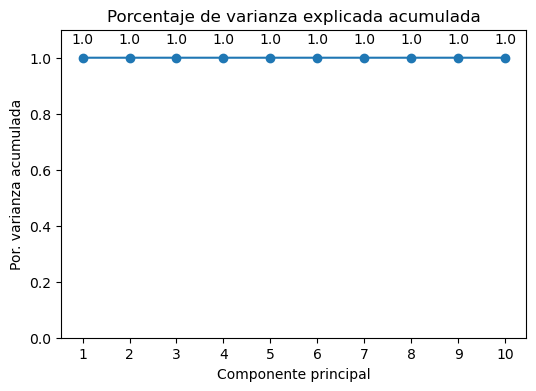

In [96]:
pca_ml = PCA()
pca_ml.fit(X_train)
X_train_pca = pca_ml.transform(X_train)
X_test_pca = pca_ml.transform(X_test)

prop_varianza_acum = pca_ml.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X_train.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_ml.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Parece que con una sola componente deberíamos obtener el mismo resultado. Veámoslo:

In [117]:
X_train_pca1 = pd.DataFrame(X_train_pca)[0]
X_test_pca1 = pd.DataFrame(X_test_pca)[0]

In [118]:
grid_search.best_estimator_.fit(pd.DataFrame(X_train_pca1), y_train)
y_pred_pca = grid_search.best_estimator_.predict(pd.DataFrame(X_test_pca1))
balanced_accuracy_score(y_test, y_pred_pca)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


0.5657701438270477

Pues parece que no. Vamos a ir directamente a score por num. de componentes:

In [130]:
for n in range(1,11):
    pca_ml = PCA(n)
    pca_ml.fit(X_train)
    X_train_pca = pca_ml.transform(X_train)
    X_test_pca = pca_ml.transform(X_test)
    
    grid_search.best_estimator_.fit(pd.DataFrame(X_train_pca), y_train)
    y_pred_pca = grid_search.best_estimator_.predict(pd.DataFrame(X_test_pca))
    print(f'Balanced_accuracy for {n} components:', balanced_accuracy_score(y_test, y_pred_pca))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got '

Balanced_accuracy for 1 components: 0.5657701438270477
Balanced_accuracy for 2 components: 0.5815687696068945
Balanced_accuracy for 3 components: 0.5788023406986664
Balanced_accuracy for 4 components: 0.5790299237664861
Balanced_accuracy for 5 components: 0.5897467695469325
Balanced_accuracy for 6 components: 0.5881536880721943
Balanced_accuracy for 7 components: 0.70299183153947
Balanced_accuracy for 8 components: 0.7575313642174004
Balanced_accuracy for 9 components: 0.7576730925949648
Balanced_accuracy for 10 components: 0.7602119384353732


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got '

Con todas las componentes (10), mejora muy levemente nuestra selección anterior. Con 8 tenemos un resultado similar, pero por debajo ya empezamos a perder bastante. 